In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
from sklearn.metrics import mutual_info_score
import math

Distribution of Length of Sleep/Wakefullness Blocks HMM

```
`# This is formatted as code`
```



In [11]:
df_lab = pd.read_csv("/content/HMM_Predictions_On_Labelled.csv")
df_ul = pd.read_csv("/content/HMM_Predictions_On_Unlabelled.csv")

In [24]:
def generate_three_labels_hist(labelled_data,predict_column):
  previous = 1.0
  count = 0.0
  lengths = []
  #three_labels = []
  for index, row in labelled_data.iterrows():
    current = row[predict_column] #name of the column of 
    if current == 1.0:
      count += 1.0
    elif previous == 1.0 and current == 0.0:
      lengths.append(count)
      #if count <= 12:
      #  three_labels.extend([2.0]*int(count))
      #else:
      #  three_labels.extend([1.0]*int(count))
      count = 0
    #if current == 0.0:
    #  three_labels.append(0.0)
    previous = current
  return lengths



In [61]:
lengths_ul_sleep = generate_three_labels_hist(df_ul, 'Predictions')
lengths_lab_sleep = generate_three_labels_hist(df_lab, 'Asleep')
lengths_ul_sleep = [i/4 for i in lengths_ul_sleep]
lengths_lab_sleep = [i/4 for i in lengths_lab_sleep]

'''
nighty_night = [i for i in lengths if i > 12.0]
#plt.hist(lengths, bins=range(0,60))
plt.xlabel('Length of Continuous Sleep')
plt.ylabel('Counts')
# show the legend
plt.legend()
# show the plot
plt.show()
'''

"\nnighty_night = [i for i in lengths if i > 12.0]\n#plt.hist(lengths, bins=range(0,60))\nplt.xlabel('Length of Continuous Sleep')\nplt.ylabel('Counts')\n# show the legend\nplt.legend()\n# show the plot\nplt.show()\n"

4.233054206718858
4.80286044686839
5.659791477787851
9.637176339111416
3.4647398084663057


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if sys.path[0] == '':


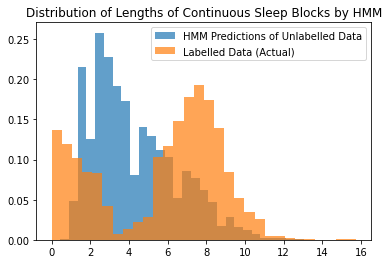

In [100]:
num_bins = 50

plt.hist(lengths_ul_sleep, bins = 30, density= True, alpha = .7, label = "HMM Predictions of Unlabelled Data",histtype='stepfilled')
print(np.mean(lengths_ul_sleep))
print(np.var(lengths_ul_sleep))

counts_hmm1, bin_edges1 = np.histogram(lengths_ul_sleep, bins = num_bins, normed = True)

plt.hist(lengths_lab_sleep, bins = 30, density = True, alpha = .7, label = "Labelled Data (Actual)",histtype='stepfilled')
print(np.mean(lengths_lab_sleep))
print(np.var(lengths_lab_sleep))
counts_hmm2, bin_edges2 = np.histogram(lengths_lab_sleep, bins = num_bins, normed = True)

plt.legend()
plt.title("Distribution of Lengths of Continuous Sleep Blocks by HMM")

print(mutual_info_score(counts_hmm2,counts_hmm1))

Distribution of Length of Sleep/Wakefullness Blocks CNN


In [30]:
df_lab_cnn = pd.read_csv("/CNN_Predictions_On_Labelled.csv")
df_ul_cnn = pd.read_csv("/CNN_Predictions_On_Unlabelled.csv")
df_lab_cnn['Asleep']/=200

In [31]:
lengths_ul_sleep_cnn = generate_three_labels_hist(df_ul_cnn, 'Asleep')
lengths_lab_sleep_cnn = generate_three_labels_hist(df_lab_cnn, 'Asleep')
lengths_ul_sleep_cnn = [i/4 for i in lengths_ul_sleep_cnn]
lengths_lab_sleep_cnn = [i/4 for i in lengths_lab_sleep_cnn]


4.570938999314599
12.499394206240078
5.659791477787851
9.637176339111416
3.541121508661683


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # This is added back by InteractiveShellApp.init_path()


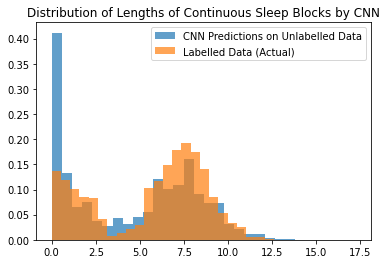

In [99]:


plt.hist(lengths_ul_sleep_cnn, bins = 30, density= True, alpha = .7, label = "CNN Predictions on Unlabelled Data")
print(np.mean(lengths_ul_sleep_cnn))
print(np.var(lengths_ul_sleep_cnn))
counts_cnn1, bin_edges1 = np.histogram(lengths_ul_sleep_cnn, bins = num_bins, normed = True)

plt.hist(lengths_lab_sleep_cnn, bins = 30, density = True, alpha = .7, label = "Labelled Data (Actual)")
print(np.mean(lengths_lab_sleep_cnn))
print(np.var(lengths_lab_sleep_cnn))
counts_cnn2, bin_edges1 = np.histogram(lengths_lab_sleep_cnn, bins = num_bins, normed = True)

plt.legend()
plt.title("Distribution of Lengths of Continuous Sleep Blocks by CNN")

print(mutual_info_score(counts_cnn2,counts_cnn1))

Distribution of Sleep Per Day (HMM)

Label Mean: 0.3356317204301075
Label Variance: 0.004035656036825067
Unlabel Mean: 0.2870749327956989
Unlabel Variance: 0.007695369833104803


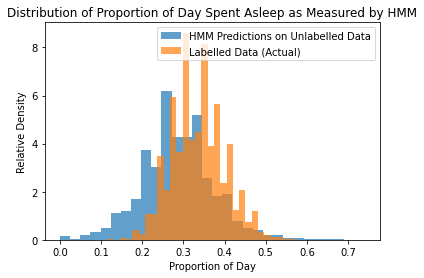

In [97]:
asleep = df_ul["Predictions"].to_numpy()
prop_ul = []
for i in range(0,math.floor(len(asleep)/96)):
    prop_ul.append(np.sum(asleep[96*i:96*(i+1)])/96)

asleep = df_lab["Asleep"].to_numpy()
prop_lab = []
for i in range(0,math.floor(len(asleep)/96)):
    prop_lab.append(np.sum(asleep[96*i:96*(i+1)])/96)


plt.hist(prop_ul, bins=30, alpha = .7, density = True, label = 'HMM Predictions on Unlabelled Data')
plt.hist(prop_lab, bins=30, alpha = .7, density = True, label = 'Labelled Data (Actual)')
plt.legend()
plt.title("Distribution of Proportion of Day Spent Asleep as Measured by HMM")
plt.xlabel("Proportion of Day")
plt.ylabel("Relative Density")

print("Label Mean: " + str(np.mean(prop_lab)))
print("Label Variance: " + str(np.var(prop_lab)))
print("Unlabel Mean: " + str(np.mean(prop_ul)))
print("Unlabel Variance: " + str(np.var(prop_ul)))


Distribution of Sleep Per Day (CNN)

Label Mean: 0.3356317204301075
Label Variance: 0.004035656036825067
Unlabel Mean: 0.3361391129032258
Unlabel Variance: 0.006614848955171841


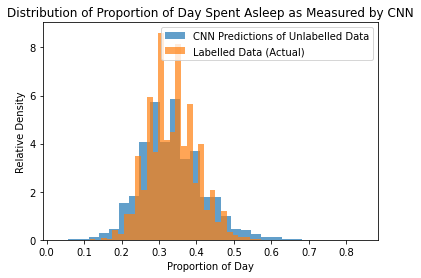

In [101]:
asleep = df_ul_cnn["Asleep"].to_numpy()
prop_ul = []
for i in range(0,math.floor(len(asleep)/96)):
    prop_ul.append(np.sum(asleep[96*i:96*(i+1)])/96)

asleep = df_lab_cnn["Asleep"].to_numpy()
prop_lab = []
for i in range(0,math.floor(len(asleep)/96)):
    prop_lab.append(np.sum(asleep[96*i:96*(i+1)])/96)


plt.hist(prop_ul, bins=30, alpha = .7, density = True, label = 'CNN Predictions of Unlabelled Data')
plt.hist(prop_lab, bins=30, alpha = .7, density = True, label = 'Labelled Data (Actual)')
plt.legend()
plt.title("Distribution of Proportion of Day Spent Asleep as Measured by CNN")
plt.xlabel("Proportion of Day")
plt.ylabel("Relative Density")

print("Label Mean: " + str(np.mean(prop_lab)))
print("Label Variance: " + str(np.var(prop_lab)))
print("Unlabel Mean: " + str(np.mean(prop_ul)))
print("Unlabel Variance: " + str(np.var(prop_ul)))